In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Load dataset with dtype=str to handle mixed data types
df = pd.read_csv('/content/PRESCRIPTIONS.csv', dtype=str)

# Strip spaces from column names
df.columns = df.columns.str.strip()

# Display available column names
print("Columns in dataset:", df.columns)

# Use the correct column name: 'DOSE_VAL_RX'
if 'DOSE_VAL_RX' not in df.columns:
    raise KeyError("Column 'DOSE_VAL_RX' not found. Please check dataset.")

# Convert 'DOSE_VAL_RX' to numeric (handling errors)
df['DOSE_VAL_RX'] = pd.to_numeric(df['DOSE_VAL_RX'], errors='coerce')

# Drop NaN values after conversion
df = df.dropna(subset=['DOSE_VAL_RX'])

# Select 'DOSE_VAL_RX' as the continuous variable for analysis
selected_variable = df['DOSE_VAL_RX']



Columns in dataset: Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ICUSTAY_ID', 'STARTDATE', 'ENDDATE',
       'DRUG_TYPE', 'DRUG', 'DRUG_NAME_POE', 'DRUG_NAME_GENERIC',
       'FORMULARY_DRUG_CD', 'GSN', 'NDC', 'PROD_STRENGTH', 'DOSE_VAL_RX',
       'DOSE_UNIT_RX', 'FORM_VAL_DISP', 'FORM_UNIT_DISP', 'ROUTE'],
      dtype='object')


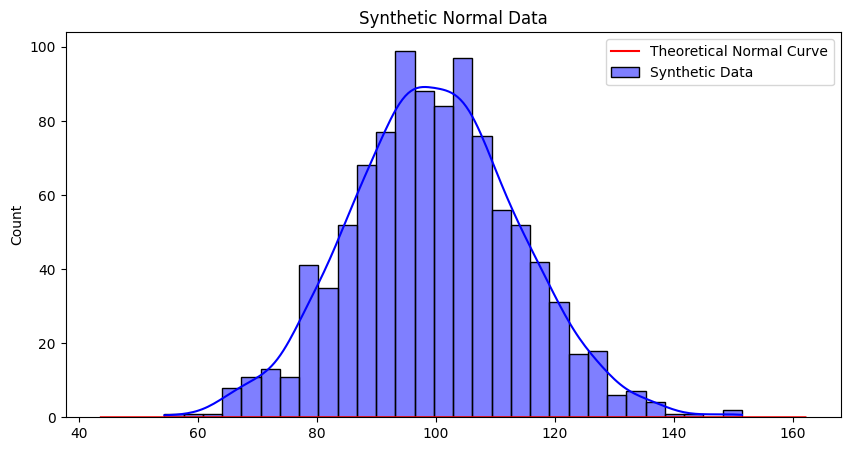

In [7]:
# 1. Generate Normally Distributed Data
synthetic_data = np.random.normal(loc=100, scale=15, size=1000)

plt.figure(figsize=(10, 5))
sns.histplot(synthetic_data, kde=True, bins=30, label="Synthetic Data", color='blue')
sns.kdeplot(synthetic_data, color='red', label="Theoretical Normal Curve")
plt.title("Synthetic Normal Data")
plt.legend()
plt.show()



In [8]:
# 2. Compute Summary Statistics
mean = selected_variable.mean()
std = selected_variable.std()
skewness = stats.skew(selected_variable)
kurtosis = stats.kurtosis(selected_variable)

print(f"Mean: {mean}, Std Dev: {std}, Skewness: {skewness}, Kurtosis: {kurtosis}")



Mean: 308.77704606827297, Std Dev: 52353.60124457178, Skewness: 1824.5587977810837, Kurtosis: 3444836.1971344305


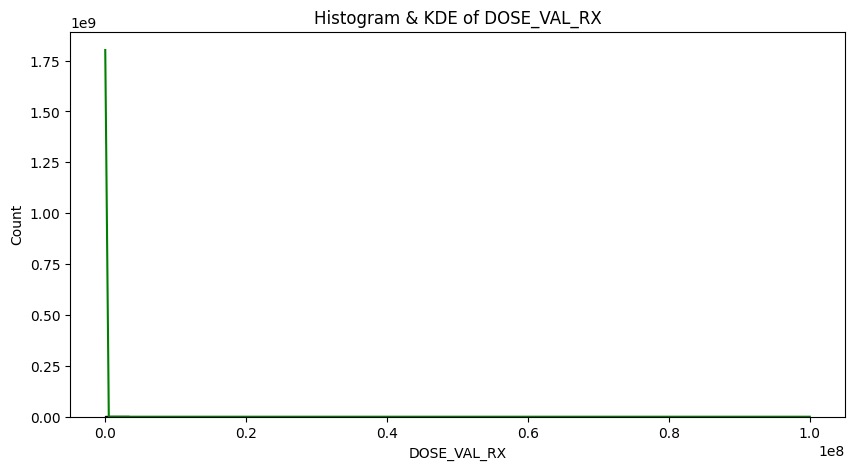

In [9]:
# 3. Check Normality
plt.figure(figsize=(10, 5))
sns.histplot(selected_variable, kde=True, bins=30, color='green')
plt.title("Histogram & KDE of DOSE_VAL_RX")
plt.show()



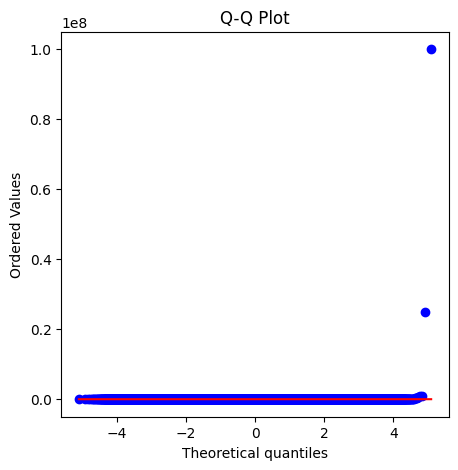

In [10]:
# Q-Q Plot
plt.figure(figsize=(5, 5))
stats.probplot(selected_variable, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()



In [11]:
# Shapiro-Wilk Test for Normality
shapiro_test = stats.shapiro(selected_variable)
print(f"Shapiro-Wilk Test: W={shapiro_test.statistic}, p={shapiro_test.pvalue}")



Shapiro-Wilk Test: W=0.00016244737368331652, p=4.39877949157782e-251


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 3879116.
  res = hypotest_fun_out(*samples, **kwds)


In [12]:
# Kolmogorov-Smirnov Test
ks_test = stats.kstest(selected_variable, 'norm', args=(mean, std))
print(f"Kolmogorov-Smirnov Test: KS Stat={ks_test.statistic}, p={ks_test.pvalue}")


Kolmogorov-Smirnov Test: KS Stat=0.49764657073548896, p=0.0


In [13]:
# 4. Normal Distribution Functions
# Compute Probability (pnorm equivalent)
p_less_than_80 = stats.norm.cdf(80, loc=mean, scale=std)
print(f"P(DOSE_VAL_RX < 80): {p_less_than_80}")



P(DOSE_VAL_RX < 80): 0.4982566902023554


In [14]:
# Find 90th percentile (qnorm equivalent)
percentile_90 = stats.norm.ppf(0.90, loc=mean, scale=std)
print(f"90th Percentile: {percentile_90}")



90th Percentile: 67402.61668294697


In [15]:
# Compute Probability Density (dnorm equivalent)
pdf_at_100 = stats.norm.pdf(100, loc=mean, scale=std)
print(f"PDF at 100: {pdf_at_100}")



PDF at 100: 7.620089139802629e-06


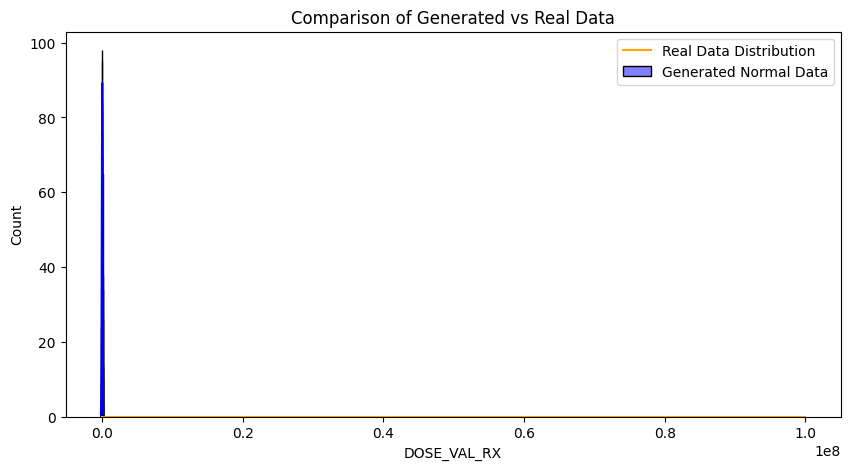

In [16]:
# Generate a Normal Distribution & Compare
generated_normal = np.random.normal(loc=mean, scale=std, size=1000)

plt.figure(figsize=(10, 5))
sns.histplot(generated_normal, kde=True, bins=30, label="Generated Normal Data", color='blue')
sns.kdeplot(selected_variable, color='orange', label="Real Data Distribution")
plt.legend()
plt.title("Comparison of Generated vs Real Data")
plt.show()


In [17]:
# 5. Confidence Interval & ICU Risk Assessment
# Compute 95% Confidence Interval
ci_low, ci_high = stats.norm.interval(0.95, loc=mean, scale=std/np.sqrt(len(selected_variable)))
print(f"95% Confidence Interval: ({ci_low}, {ci_high})")


95% Confidence Interval: (256.6781803041948, 360.8759118323511)


In [18]:
# Probability of DOSE_VAL_RX > 150
p_greater_than_150 = 1 - stats.norm.cdf(150, loc=mean, scale=std)
print(f"P(DOSE_VAL_RX > 150): {p_greater_than_150}")


P(DOSE_VAL_RX > 150): 0.5012099030100328


In [20]:
# Interpretation
if 150 > ci_high:
    print("Patients with DOSE_VAL_RX > 150 are outside normal range and may be high-risk.")
else:
    print("Patients with DOSE_VAL_RX = 150 are within normal range.")


Patients with DOSE_VAL_RX = 150 are within normal range.
